<a href="https://colab.research.google.com/github/yongchenyen/Python/blob/main/%E5%88%86%E7%BE%A4%E6%96%B9%E6%B3%95_%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90_2014_2017%E7%BE%8E%E5%9C%8B%E8%B6%85%E5%B8%82%E6%9C%83%E5%93%A1%E9%8A%B7%E5%94%AE%E6%95%B8%E6%93%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means中，我們主要用的模型在sklearn.cluster裡面的KMeans。

因此我們先把它載入起來

sklearn 中四種不同資料前處理方式

1.   StandardScaler (平均值和標準差)
2.   MinMaxScaler(最小最大值標準化)
3.   MaxAbsScaler（絕對值最大標準化）
4.   RobustScaler

加入 Seaborn 套件，matplotlib 為基礎建構的高階繪圖套件，讓使用者更加輕鬆地建立圖表

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

讀取資料

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/2014-2017美國超市會員銷售數據 - 複製.csv')
df.head() #取前五筆資料

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


info：可以看到上面顯示了有哪些columns、大小和資料類型等等。

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     9994 non-null   float64
 1   Quantity  9994 non-null   int64  
 2   Discount  9994 non-null   float64
 3   Profit    9994 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 312.4 KB


shape：用於顯示(rows,columns)

In [ ]:
df.shape

(9994, 4)

使用describe()可以用來一次求得

1.   均值(mean)
2.   標準差(std)
3.   min
4.   1/4位數
5.   中位數
6.   3/4位數
7.   max

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


載入中文字體

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

--2023-09-17 13:25:06--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.121.138, 108.177.121.139, 108.177.121.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.121.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0umj4oq4gsec7l5espb8e8u8oo5002b9/1694957100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=0bdc93c3-9e11-46c3-9c07-96a808e1330b [following]
--2023-09-17 13:25:09--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0umj4oq4gsec7l5espb8e8u8oo5002b9/1694957100000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=0bdc93c3-9e11-46c3-9c07-96a808e1330b
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to d

我們先把資料轉換成圖示方式進行解析

plt.figure(figsize=(a, b)) a圖形寬， b 圖形高

plt.subplot(row, column, index) 列、欄位、第幾個圖

plt.subplots_adjust(hspace =0.5 , wspace = 0.5) 間距取50%

Seaborn is a library for making attractive and informative statistical graphics in Python.

import seaborn as sns

sns.distplot(df[i] , bins = 5) 畫圖，分成五個區間

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<ipython-input-14-8989c3e2b9a0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins=5) #畫圖，分成五個區間
<ipython-input-14-8989c3e2b9a0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i], bins=5) #畫圖，分成五個區間
<ipython-input-14-8989c3e2b9a0>:13: UserWarning: 

`distplot` is a deprecated fu

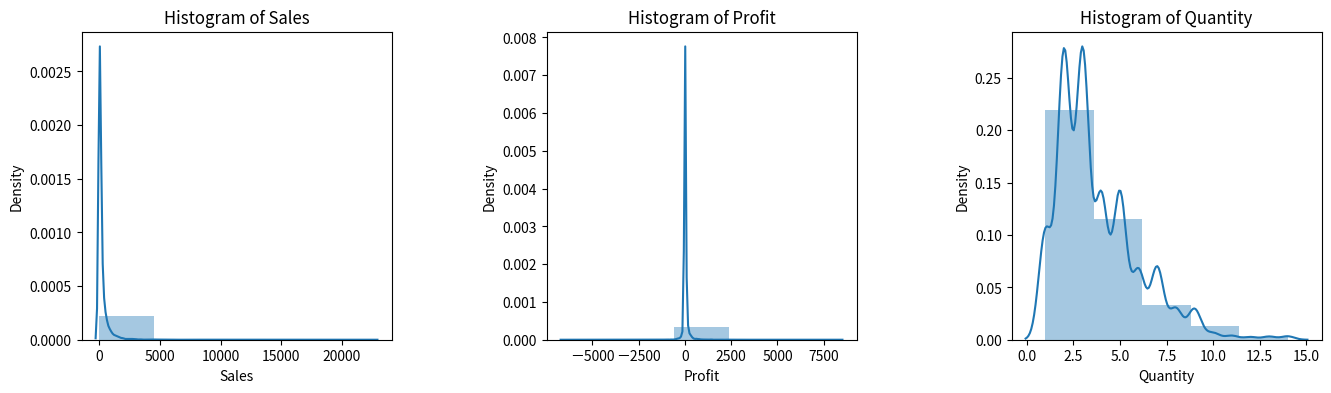

In [ ]:
#圖片顯示中文字體
from pylab import mpl
from matplotlib.font_manager import fontManager
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

plt.figure(figsize=(16,4)) #圖形(寬,高)
n = 0
for i in ['Sales', 'Profit', 'Quantity']:
  n += 1
  plt.subplot(1, 3, n) #列、欄位、第幾個圖
  plt.subplots_adjust(hspace=0.5, wspace=0.5) #間距取50%
  sns.distplot(df[i], bins=5) #畫圖，分成五個區間
  plt.title(f'Histogram of {i}')
plt.show()

繪製出不同的scatter來進行比較

Text(0, 0.5, 'Profit')

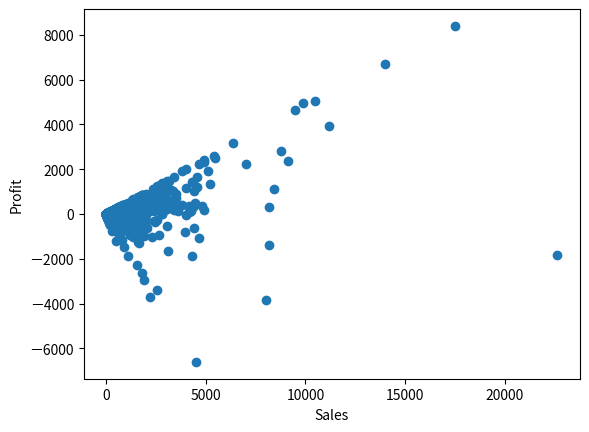

In [ ]:
plt.scatter(df['Sales'], df['Profit'])

plt.xlabel('Sales')
plt.ylabel('Profit')

標號數字不需進入訓練，先檢視一下原始的資料內容

In [ ]:
df.head()

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


移除不要的欄位，data frame 可以透過 drop()方法來刪除觀測值或欄位

axis = 0 表示要刪除觀測值（row），指定參數 axis =1 表示要刪除欄位（column）

In [ ]:
X = df.drop(['Quantity','Discount'], axis=1)
print(X.head())

      Sales    Profit
0  261.9600   41.9136
1  731.9400  219.5820
2   14.6200    6.8714
3  957.5775 -383.0310
4   22.3680    2.5164


# 分群方法

將資料先設定我要分群的數量 k=3

找出他的重心 k 個聚類重心（centroids）

以新聚類平均找出新重心，重新對資料劃分歸屬

重複直到沒有資料點改變聚類歸屬。

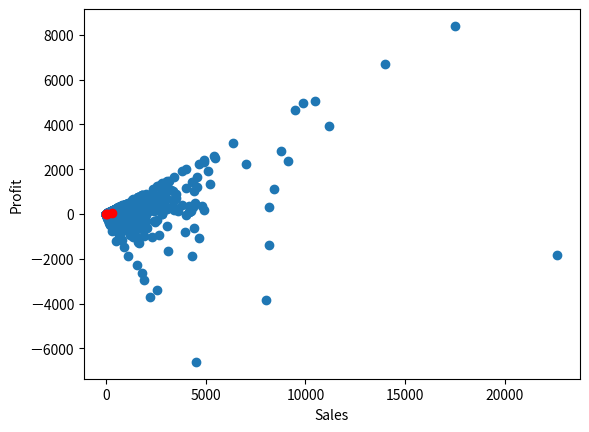

In [ ]:
K=3
Centroids = (X.sample(n=K))
plt.scatter(df['Sales'], df['Profit'])
plt.scatter(Centroids['Sales'], Centroids['Profit'], c='red')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

檢查分群的標記資料

In [ ]:
Centroids

,Sales,Profit
6586,19.68,5.7072
1529,7.30,3.4310
6860,274.89,46.7313


# 建立群的模型
假設我們要分為8群，我們這邊就建立 n_clusters=8 init為k-means++，表示選擇k-means++演算法，指定變數model。

放入 model.fit(X) 訓練特徵，使用X當作特徵

n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。

n_cluster: K的大小，也就是分群的類別數量。

predict() 函數使我們能夠在訓練模型的基礎上預測數據值的標籤。

將所有資料分為幾個標號，我們先從模型中通過陣列印出

predict: 預測並回傳類別。

In [ ]:
model.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

把標籤印出

In [ ]:
df['群'] = model.labels_
print(df.groupby('群').mean())

          Sales  Quantity  Discount       Profit
群                                               
0    135.627310  3.683004  0.157516    13.843847
1   1801.535099  5.887473  0.130425   246.482126
2  10608.891067  5.466667  0.133333  2578.443113


更細分的推估，假設可以分成幾群

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

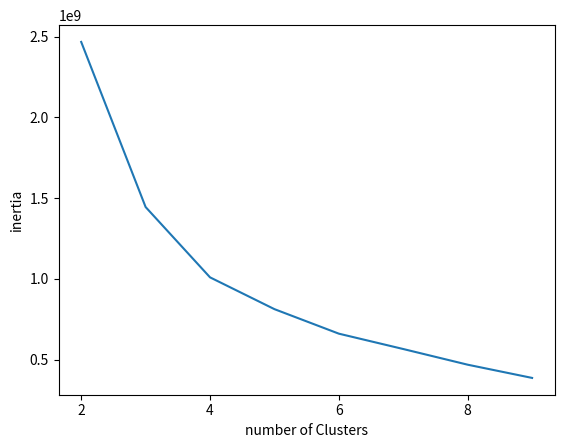

In [ ]:
iner = []
for i in range(2,10):
  model = KMeans(init = 'k-means++', n_clusters = i)
  model.fit(X)
  iner.append(model.inertia_) #inertia_：float，每個點到其他叢集的質心的距離之和。
plt.plot(range(2,10), iner)
plt.xlabel('number of Clusters')
plt.ylabel('inertia')
plt.xticks(range(2,10,2))
plt.show()

假如分成8群的結果

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 6.66505385e+01  9.19059244e+00]
 [ 3.36171131e+03  8.04375149e+02]
 [ 1.57499550e+04  7.55997840e+03]
 [ 5.38469932e+02  4.00324239e+01]
 [ 8.81772691e+03  2.65525079e+03]
 [ 2.26384800e+04 -1.81107840e+03]
 [ 1.42336630e+03  1.93672327e+02]
 [ 3.31375333e+03 -3.21405150e+03]]


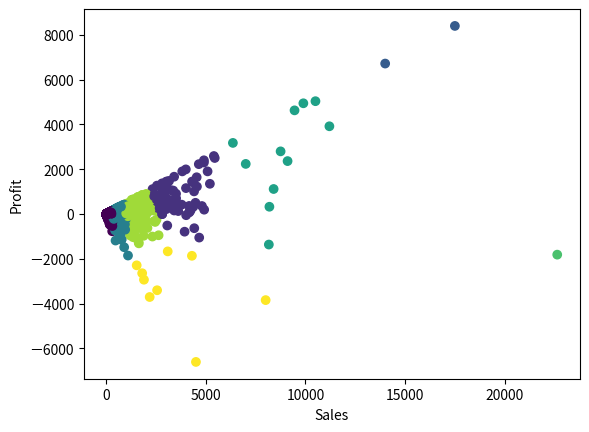

In [ ]:
model = KMeans(init = 'k-means++', n_clusters = 8)
model.fit(X)
print(model.cluster_centers_)
plt.scatter(X['Sales'], X['Profit'], c=model.labels_)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()